# Heart Decease Predictor

## Importing libraries & data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook')
%matplotlib inline

df = pd.read_csv('heart.csv')
pd.set_option('display.max_column()', None)
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA & Visualization

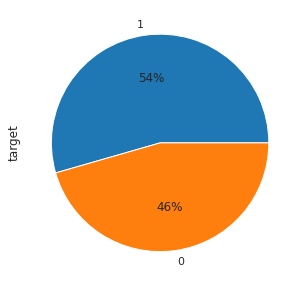

In [14]:
plt.figure(1, figsize=(10,5))
pie = df.target.value_counts().plot.pie(y='target', autopct='%1.0f%%')

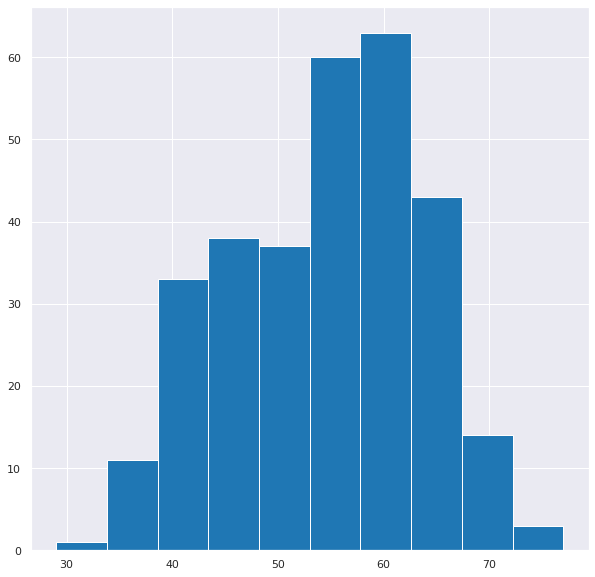

In [15]:
plt.figure(1, figsize=(10,10))
plt.hist(df.age, bins=10)
plt.show()

Heart desceases have most chance of occurrance between ageses of 53 to 67

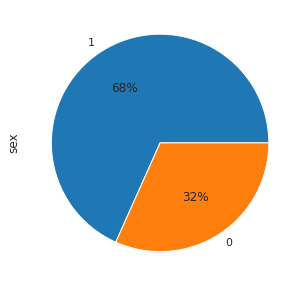

In [16]:
plt.figure(1, figsize=(10,5))
pie = df.sex.value_counts().plot.pie(y='sex', autopct='%1.0f%%')

more men are prone to have heart decease than woman as per the data

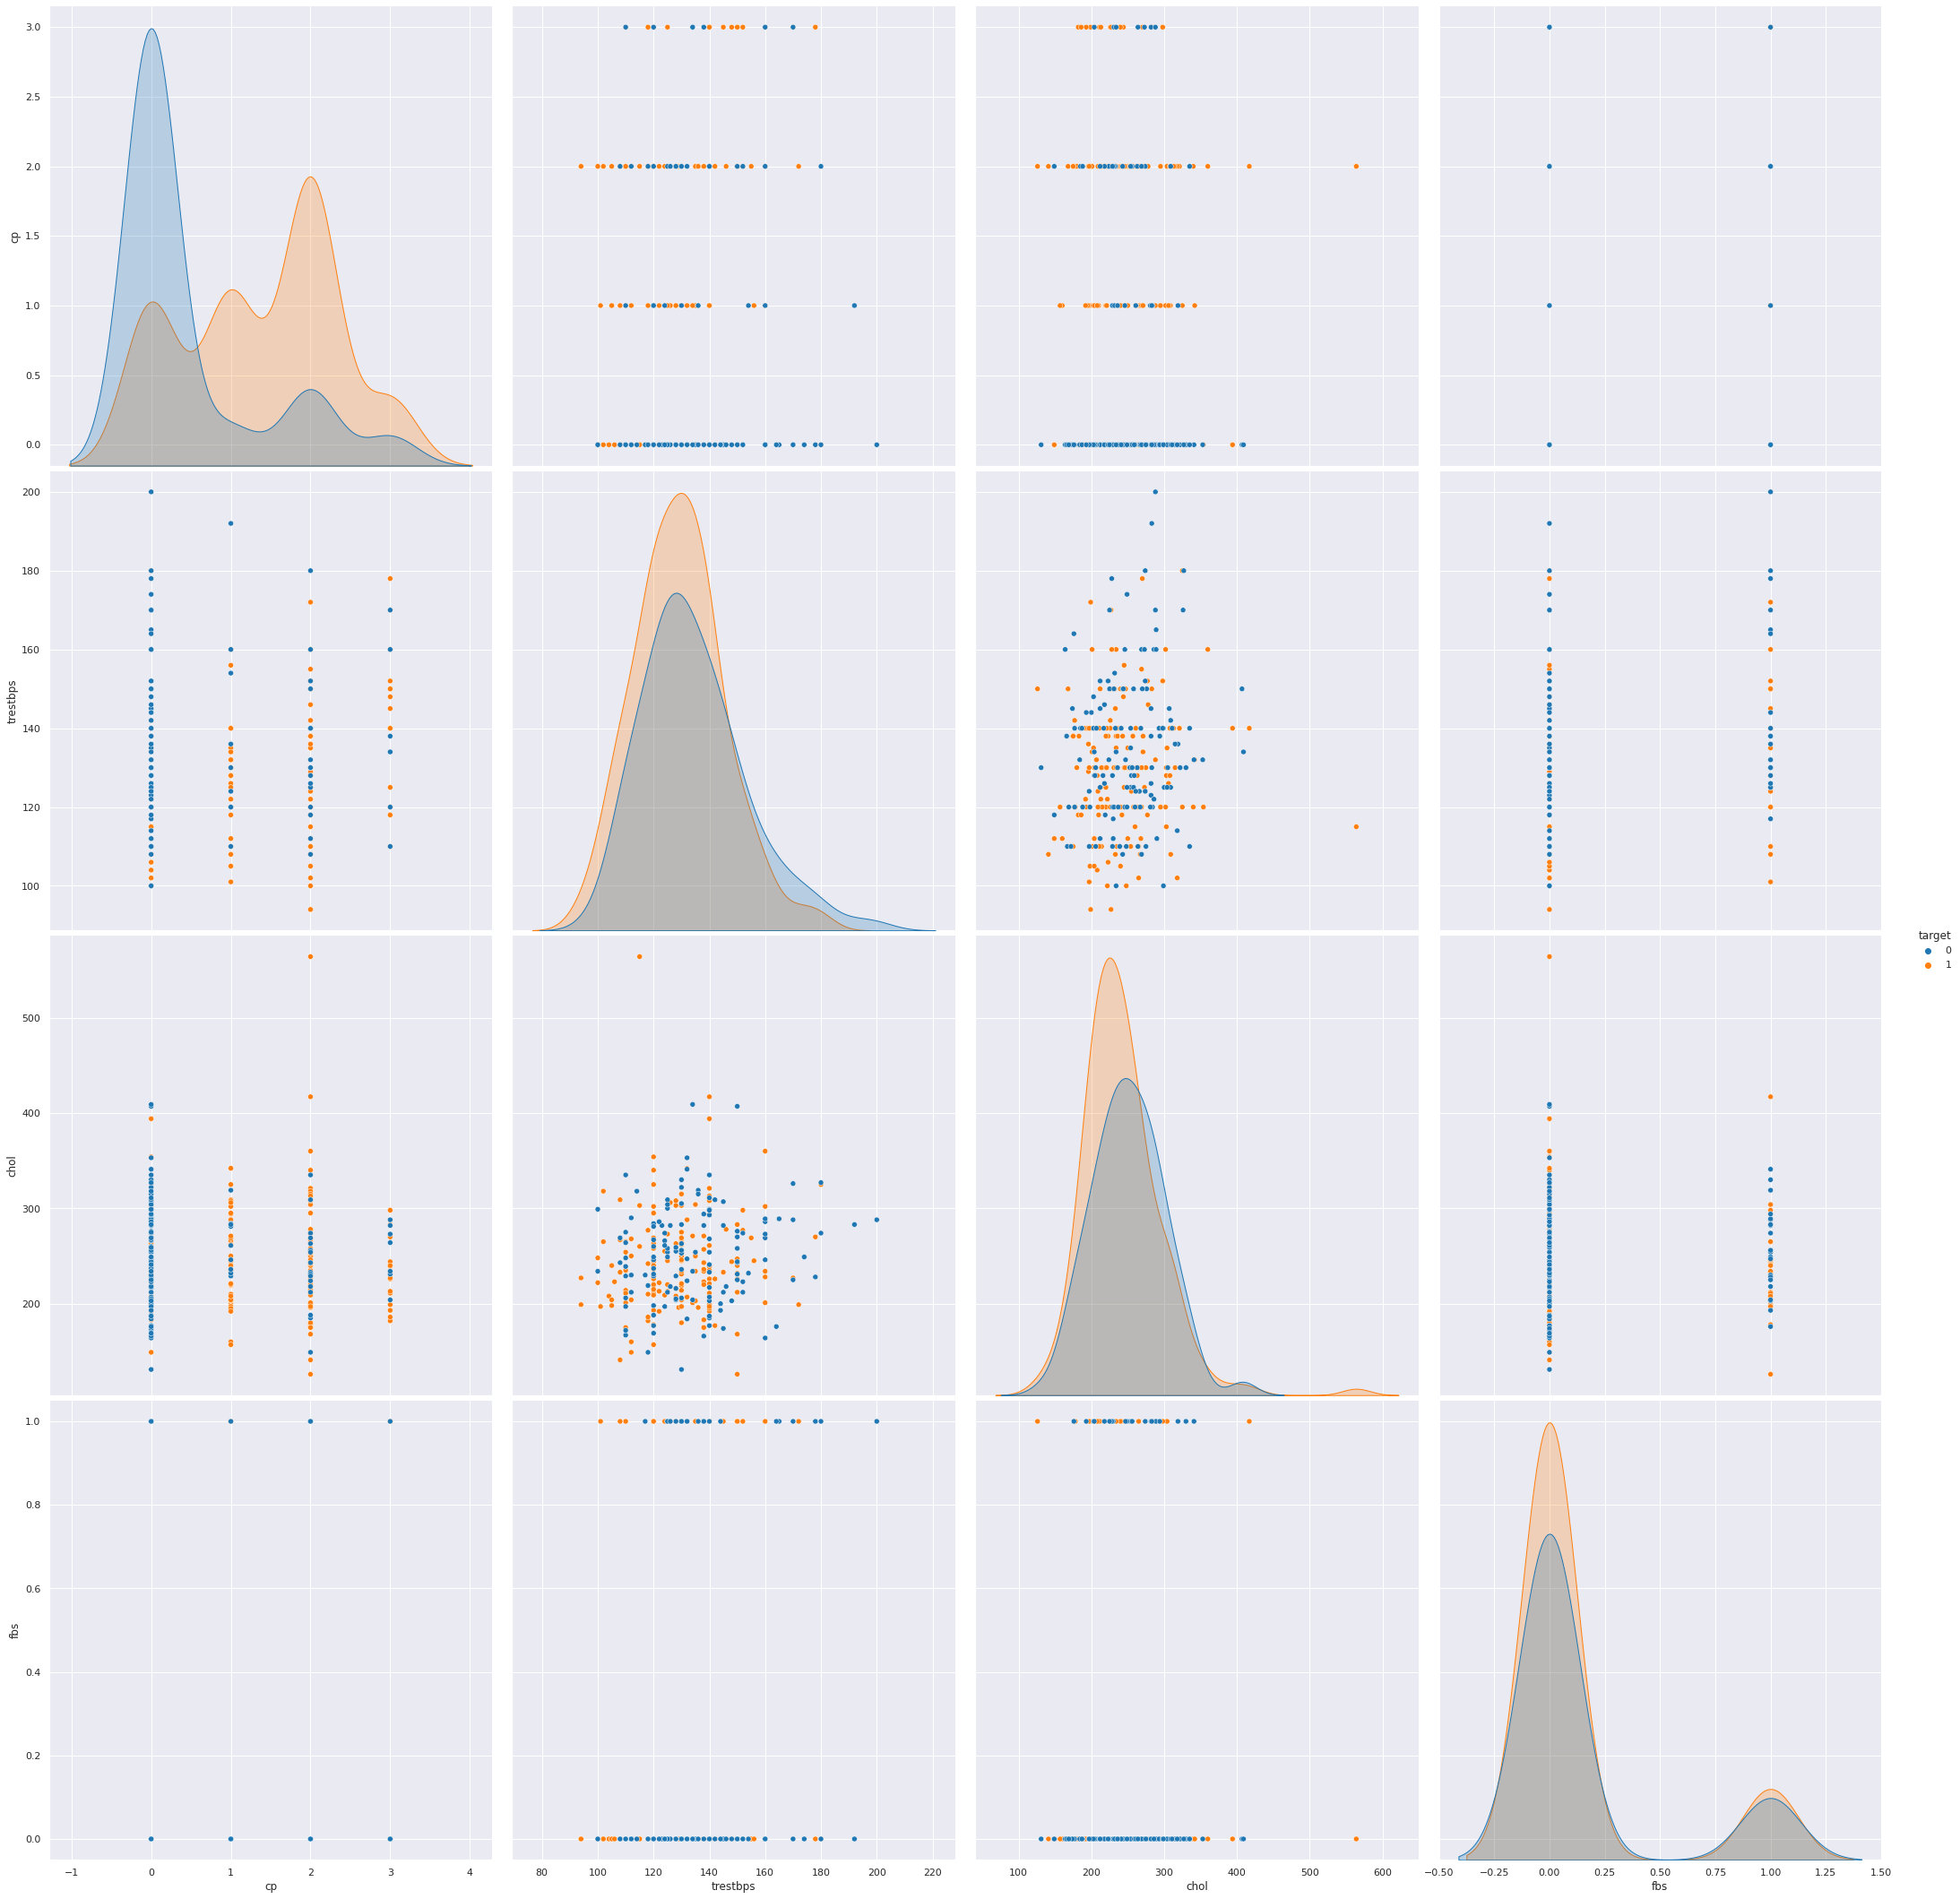

In [17]:
sns.pairplot(df[['cp','trestbps','chol','fbs','target']], hue="target", height=7.5)

From the above figure we can conclude that
- Chest pain type 2 is dangerous and more common among heart paitents for a potential heart decease
- The resting blood pressure ranged between 90 to 160 is more common for heart paitents
- Heart patients have Cholestrol levels ranging from 120mg/dl to 400mg/dl on an appoxtimation
- The data represents that the fasting blood sugar < 120 mg/dl(i.e. 0) are more prone to have a heart decease

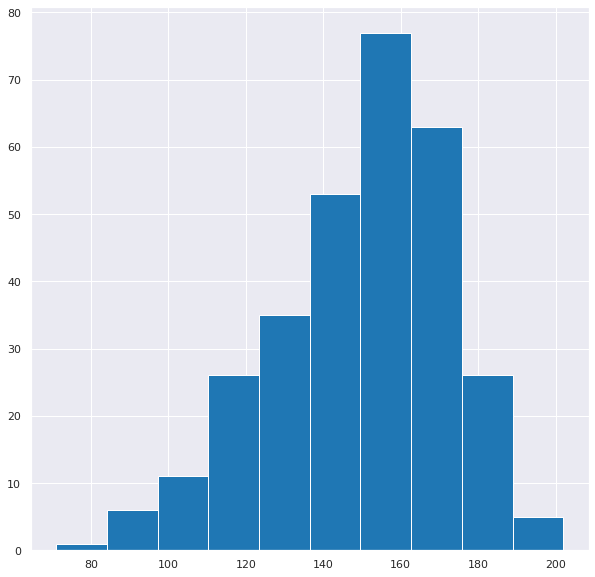

In [18]:
plt.figure(1, figsize=(10,10))
plt.hist(df.thalach)
plt.show()

Maximum heart rate achieved in patients is maxed at 160 and lies in the range of 140 to 180

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap
2. feature_importance_
3. SelectKBest

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
x = df.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = df.target
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


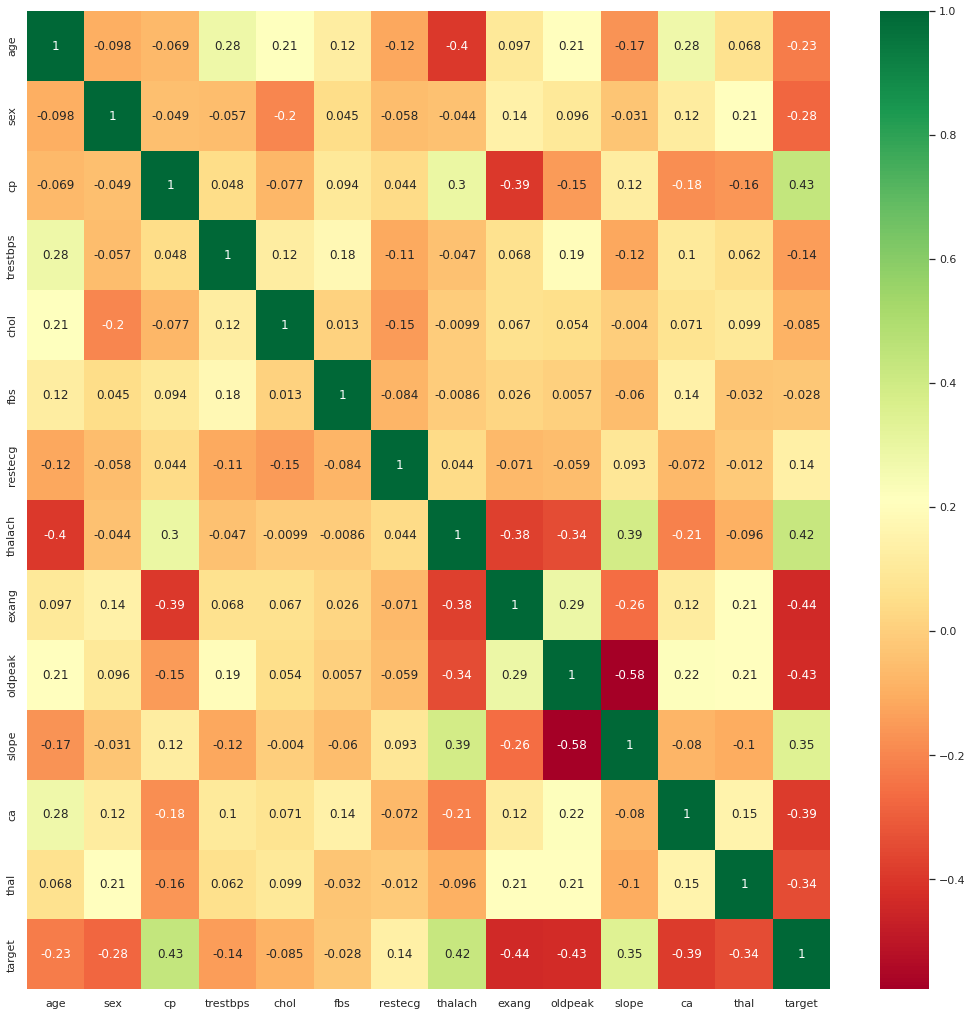

In [22]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [24]:
selection.feature_importances_

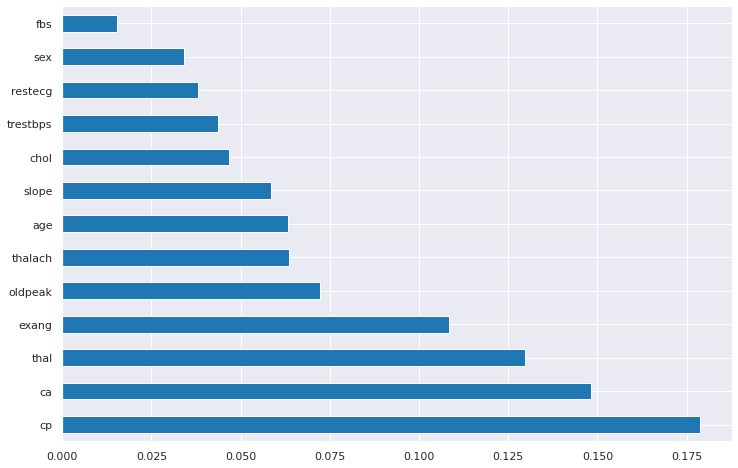

In [25]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model Builing

#### Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
-  Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=44)

model = RandomForestRegressor()

model.fit(x_train, y_train)

pred = model.predict(x_test)

In [28]:
model.score(x_train, y_train)

0.9211151894769809

In [29]:
model.score(x_test, y_test)

0.5162110104529615

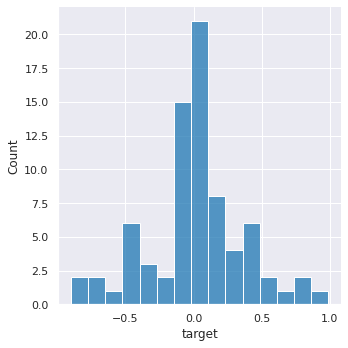

In [30]:
sns.displot(y_test-pred)
plt.show()

In [31]:
print("MAE score:", metrics.mean_absolute_error(y_test, pred))
print("MSE score:", metrics.mean_squared_error(y_test, pred))

MAE score: 0.24434210526315794
MSE score: 0.12019342105263159


In [32]:
metrics.r2_score(y_test,pred)

0.5162110104529615

## Hyperparameter Tuning

- Choose following method for hyperparameter tuning
  1. RandomizedSearchCV --> Fast
  2. GridSearchCV
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [36]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [39]:
prediction = rf_random.predict(x_test)

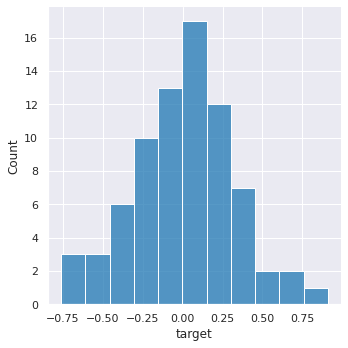

In [40]:
plt.figure(figsize=(8,8))
sns.displot(y_test-prediction)
plt.show()

In [41]:
print("MAE score:", metrics.mean_absolute_error(y_test, prediction))
print("MSE score:", metrics.mean_squared_error(y_test, prediction))

MAE score: 0.25530058911145787
MSE score: 0.10671994213958498


## Save the model to reuse it again

In [44]:
import pickle

file = open('heart_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

model_ = open('heart_rf.pkl','rb')
forest = pickle.load(model_)

y_prediction = forest.predict(x_test)

metrics.r2_score(y_test, y_prediction)

0.570442936725963